# SYSTEMS AND NETWORK BIOLOGY- PRACTICAL 1

# Network motifs

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objectives of this practical are:
- To become familiar with the Python package networkx for graph manipulation. 
- To identify network motifs in two publicly available transcriptional networks for *E. coli*. 


# 0. Introduction to `NetworkX`

The networkX package has a large number of functions to work with network objects. During this practical session you will need to use some of them that are listed here. **Notice that expressions like `<graph>` or `<node>` are not valid Python, and you are expected to substitute them by a variable that holds a networkx graph object or a string with the name of a node, respectively.**

*   `<graph> = nx.DiGraph()` creates a directed graph.

*   `<graph>.number_of_nodes()` returns the number of nodes of the `<graph>` object.

*   `<graph>.number_of_edges()` returns the number of edges of the `<graph>` object.

*   `<graph>.nodes()` returns a list with all the nodes in `<graph>`

*   `<graph>.neighbors(<node>)` returns a list with all the neighbors of node `<node>`

*   `<graph>.successors(<node>)` returns a list with all nodes receiving connections from `<node>`

*   `<graph>.add_edge(<node1>,<node2>)` adds an edge in the `<graph>` graph from node `<node1>` to node `<node2>`  .

*   `<graph>.remove_node(<node>)` removes the node with name `<node>` from the `<graph>` graph.

*   `<graph_copy> = <graph>.copy()` returns a **deep copy** of the `<graph>` graph object (**deep** which means that one can modify `<graph_copy>` without affecting `<graph>`).

# 1. Importing the network

There is a large number of databases of cellular regulatory networks (involving metabolic reactions, protein-protein interactions, gene regulation, ...). In this practical session we will work with a transcription factor network, which can usually be treated as a directed simple graph. We will use the database compiled in the lab of Uri Alon from existing literature (Shen-Orr et al, Nature Genetics, 2002), which describes gene regulatory interactions in _Escherichia coli_.

First we will import all necessary packages including the [`networkX`](http://networkx.github.io/) package:

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next we will download the database, loading it into a graph object. To that end, we have created the following function:

In [2]:
def load_network(fname):
    G=nx.DiGraph()
    fh=open(fname,'r')
    for line in fh.readlines():
        n1,n2,s=line.split()
        G.add_edge(n1,n2)
    return G

The database can be found at [Uri Alon's lab website](http://www.weizmann.ac.il/mcb/UriAlon/). In that page you will find a **Downloable Materials** drop down menu. Within that menu, select **Donwloadable data**, then **E. coli transcription network** (third by the end) and then download **Version 1.1**, which is a compressed file. Extract the files and explore their content, in particular the `README.txt` file, that explains the contents of the folder.

Use the function ``load_network`` given above to load the file ``coliInterFullVec.txt``.

In [3]:
#write your code here#
data = load_network("coliInterFullVec.txt")
data

# 2. Visualizing and analyzing the network

Plot the network using networkx draw function.

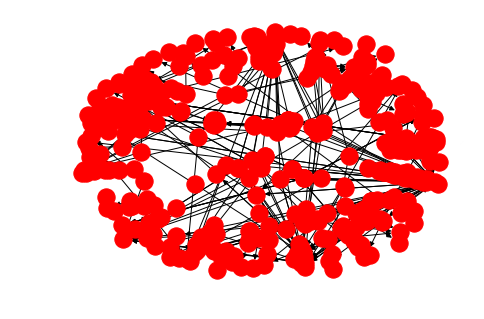

In [4]:
#write your code here#
nx.draw(data)

Calculate (1) how many operons (nodes) are included in the network, (2) how many regulations (edges) are described, (3) the average connectivity $\lambda=E/N$ of the network, and (4) the connection probability $p=E/N^2$.

In [5]:
#write your code here#
nodes=nx.number_of_nodes(data)
edges=nx.number_of_edges(data)
print("nodes: ",nodes,"edges: ",edges,"average connectivity: ",edges/nodes,"connection probability: ",edges/nodes**2)

nodes:  423 edges:  578 average connectivity:  1.3664302600472813 connection probability:  0.0032303315840361262


# 3. Direct feedback loops

Next, calculate the number of direct feedback loops (self-edges, to be called simply "feedback loops" in what follows) in this network.

In [6]:
#write your code here#
print("direct feedback loops: ",nx.number_of_selfloops(data))

direct feedback loops:  59


In order to determine whether the feedback loop is a network motif, we need to compare this number with the number of feedback loops we would expect by chance. To that end, we will now create a random network with the same number $N$ of nodes and connection probability $p$ as the real gene regulatory network. The simplest way of doing this is by creating an $N\times N$ matrix whose elements are uniform random numbers distributed between 0 and 1 (using the function `rand` from the package `numpy.random`), and comparing each element of this matrix with the connection probability $p$. The result of this comparison for all matrix elements will correspond to the adjacency matrix of the random network. Next, use the command `<graph> = nx.from_numpy_matrix(A , create_using=nx.DiGraph())` to generate the corresponding graph. Calculate the number of edges in the graph to check if the process has been done correctly. Draw the matrix.

edges:  592 nodes:  423 self loops:  3


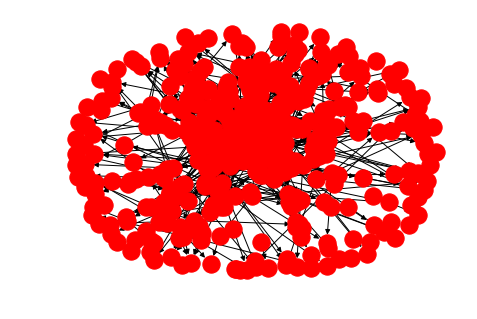

In [7]:
#write your code here#
self_loop_prob=edges/nodes**2
r_m=np.random.rand(nodes,nodes)

for i in range(len(r_m)):
    for j in range(len(r_m)):
        if r_m[i][j]<self_loop_prob:
            r_m[i][j]=1
        else:
            r_m[i][j]=0
        
random_Matz=nx.from_numpy_matrix( r_m, create_using=nx.DiGraph())
print("edges: ",nx.number_of_edges(random_Matz), "nodes: ",nx.number_of_nodes(random_Matz),"self loops: ",nx.number_of_selfloops(random_Matz))
nx.draw(random_Matz)

Next, generate a collection of 1000 random matrices and calculate for each instance the number of feedback loops. Plot the distribution (histogram) of this quantity and determine its average value. Compare this result with the number of copies of feedback loops found in the real gene regulatory network, to establish if that module is a network motif.

In [8]:
#write your code here#
fl=[]
for i in range(100):
    rm=np.random.rand(nodes,nodes)
    for i in range(len(rm)):
        for j in range(len(rm)):
            if rm[i][j]<self_loop_prob:
                rm[i][j]=1
            else:
                rm[i][j]=0
    rand_m=nx.from_numpy_matrix( rm, create_using=nx.DiGraph())
    #print(nx.number_of_selfloops(rand_m),nx.number_of_edges(rand_m))
    fl.append(nx.number_of_selfloops(rand_m))



(array([27.,  0., 31.,  0., 22.,  0., 12.,  0.,  7.,  1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

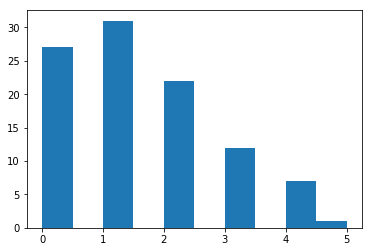

In [9]:
plt.hist(fl)

In [10]:
#comparing

z=((nx.number_of_selfloops(data)-np.mean(fl))/np.std(fl))
z
#big score

45.99063945263767

# 4. Feedforward loops

Finally, we will compute the number of feedforward loops in both the real gene regulatory network and in its randomized versions. To identify the feedforward loops in a graph we will use the following function:

In [11]:
import networkx.algorithms.isomorphism as iso

def find_pattern(graph, pattern):
    """Find all the subgraphs isomorphic to the given pattern.

    Return an iterator over all the subgraphs in `graph` that are isomorphic to
    the specified `pattern`. It works for both directed and undirected graphs,
    but the type of `graph` and `pattern` arguments must be coherent.
    

    Based on the code from
    https://zulko.wordpress.com/2012/10/13/finding-a-subnetwork-with-a-given-topology-in-e-coli/
    """
    edge_match = None
    
    if graph.is_directed() and pattern.is_directed():
        matcher = iso.DiGraphMatcher(graph, pattern, edge_match=edge_match)
    elif not graph.is_directed() and not pattern.is_directed():
        matcher = iso.GraphMatcher(graph, pattern, edge_match=edge_match)
    else:
        raise TypeError("type of `graph` and `pattern` arguments is not "
                        "coherent!")

    return matcher.subgraph_isomorphisms_iter()


First, we need to design a pattern in the form of a feedforward loop. Create a directed graph and add three edges to it using the corresponding functions given in Section 0 above. Draw the circuit to check that it is a feedforward loop.

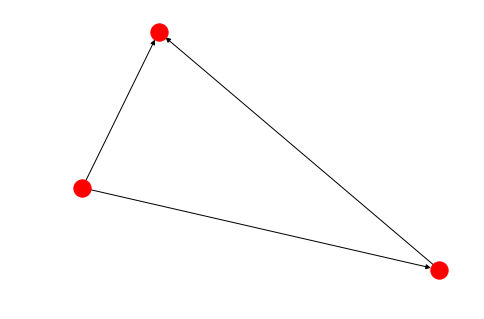

In [12]:
#write your code here#
graph=nx.DiGraph()
graph.add_edge(0,1)
graph.add_edge(1,2)
graph.add_edge(0,2)

nx.draw(graph)

Next, use the function `find_pattern` to find all instances of feedforward circuits in the real gene regulatory network. To do that we will now load the version of the network with no self-loops, `coliInterNoAutoRegVec.txt`. How many feedforward loops are found in the network?

In [13]:
#write your code here#
data4 = load_network("coliInterNoAutoRegVec.txt")

k=list(find_pattern(data4,graph))
print("amount of feed forward loops: ", len(k))

amount of feed forward loops:  42


Finally, generate a collection of 1000 random matrices and calculate for each instance the number of feedforward loops. Plot the distribution (histogram) of this quantity and determine its average value. Compare this result with the number of copies of feedforward loops found in the real gene regulatory network, to establish if that module is a network motif.

In [14]:
#write your code here#
fb=[]
con_prob4=data4.number_of_edges()/data4.number_of_nodes()**2
for i in range(100):
    rm4=np.random.rand(data4.number_of_nodes(),data4.number_of_nodes())
    for i in range(len(rm4)):
        for j in range(len(rm4)):
            if rm4[i][j]<con_prob4:
                rm4[i][j]=1
            else:
                rm4[i][j]=0
    rand_m=nx.from_numpy_matrix( rm4, create_using=nx.DiGraph())
    k4=list(find_pattern(rand_m,graph))
    #print(nx.number_of_selfloops(rand_m),nx.number_of_edges(rand_m))
    fb.append(len(k4))




(array([19., 31.,  0., 23.,  0., 14.,  9.,  0.,  3.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

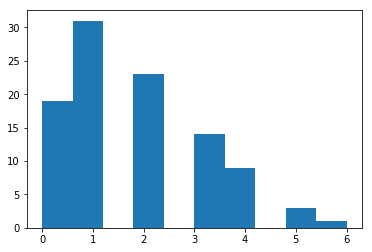

In [15]:
plt.hist(fb)

In [16]:
z4=((len(k)-np.mean(fb))/np.std(fb))
z4
#big score

28.87278236989366